# AutoEncoders

`AutoEncoders` - models that decrease the dimetionality of the data and learn pattern how to recreate teh data. They have the same number of outputs as inputs.

![alt text](AutoEncoder.png "Title")

## AutoEncoder

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [6]:
points=100
angles = np.random.rand(points) * 3 * np.pi / 2 - 0.5
data = np.empty((points, 3))
data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(points)/2
data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(points) / 2
data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(points)
data[:10,:]

array([[-1.11537801, -0.42221322, -0.21952618],
       [ 1.10015371,  0.38893965,  0.26391266],
       [ 1.15454146,  0.53675217,  0.15152919],
       [ 0.83149122, -0.08137369,  0.19249408],
       [ 1.11441895,  0.39125941,  0.17936339],
       [ 0.93637378,  0.61426744,  0.21332299],
       [-0.24670082,  0.54430299,  0.15274172],
       [-1.07157449, -0.32464719, -0.28201567],
       [-1.01432146, -0.49671006, -0.30501456],
       [ 0.51141706,  0.72513406,  0.15861807]])

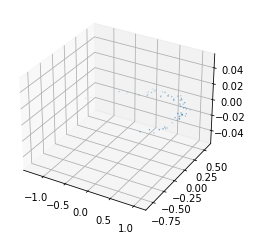

In [18]:
X_train = data - data.mean(axis=0, keepdims=0)
plt.figure().add_subplot(projection='3d')
plt.scatter(X_train[:,0],X_train[:,1],X_train[:,2])

#### Model

In [25]:
encoder=tf.keras.models.Sequential([tf.keras.layers.Dense(2,input_shape=[3])])
decoder=tf.keras.models.Sequential([tf.keras.layers.Dense(3,input_shape=[2])])
autoencoder=tf.keras.models.Sequential([encoder,decoder])
autoencoder.compile(loss='mse',optimizer=tf.keras.optimizers.SGD(learning_rate=1.5))

In [26]:
history=autoencoder.fit(X_train,X_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 0.9829
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0735
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0334
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0282
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0786
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

#### Encoder

In [31]:
encodings=encoder.predict(X_train)

4/4 [==============================] - 0s 3ms/step


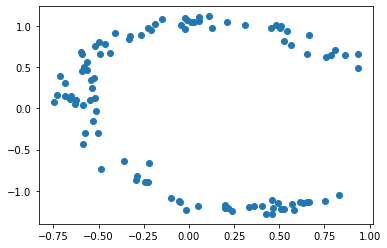

In [32]:
plt.scatter(encodings[:,0],encodings[:,1])

#### Decoder

In [33]:
decodings=decoder.predict(encodings)

4/4 [==============================] - 0s 3ms/step


C:\Users\pk764\miniconda3\envs\data\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


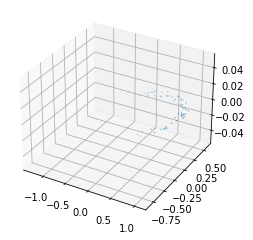

In [34]:
plt.figure().add_subplot(projection='3d')
plt.scatter(decodings[:,0],decodings[:,1],decodings[:,2])

---

## Visual AutoEncoder

In [49]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

C:\Users\pk764\miniconda3\envs\data\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Data

In [50]:
def map_image(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    image = tf.reshape(image, shape=(784,))
    return image, image

In [51]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

#### Model

In [43]:
inputs=tf.keras.layers.Input(shape=(784,))
encoder=tf.keras.layers.Dense(32,activation='relu')(inputs)
decoder=tf.keras.layers.Dense(784,activation='sigmoid')(encoder)

#inputs_decoder=tf.keras.layers.Input(shape=(32,))
#decoder_model=tf.keras.models.Model(inputs=inputs_decoder,outputs=decoder)

encoder_model=tf.keras.models.Model(inputs=inputs,outputs=encoder)
autoencoder=tf.keras.models.Model(inputs=inputs,outputs=decoder)

In [45]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam())

In [53]:
train_steps=60000 // BATCH_SIZE
history=autoencoder.fit(train_dataset,steps_per_epoch=train_steps,epochs=20)

Epoch 1/20
468/468 [==============================] - 4s 8ms/step - loss: 0.0961
Epoch 2/20
468/468 [==============================] - 4s 8ms/step - loss: 0.0952
Epoch 3/20
468/468 [==============================] - 4s 8ms/step - loss: 0.0947
Epoch 4/20
468/468 [==============================] - 4s 9ms/step - loss: 0.0943
Epoch 5/20
468/468 [==============================] - 4s 8ms/step - loss: 0.0941
Epoch 6/20
468/468 [==============================] - 4s 8ms/step - loss: 0.0939
Epoch 7/20
468/468 [==============================] - 4s 9ms/step - loss: 0.0938
Epoch 8/20
468/468 [==============================] - 4s 9ms/step - loss: 0.0937
Epoch 9/20
468/468 [==============================] - 4s 9ms/step - loss: 0.0936
Epoch 10/20
468/468 [==============================] - 4s 9ms/step - loss: 0.0935
Epoch 11/20
468/468 [==============================] - 4s 9ms/step - loss: 0.0934
Epoch 12/20
468/468 [==============================] - 4s 9ms/step - loss: 0.0934
Epoch 13/20
468/468 [====

#### Prediction

In [69]:
images=test_dataset.take(1)
for input_image, image in tfds.as_numpy(images):
      output_samples = input_image

In [72]:
encoded=encoder_model.predict(images)
predicted=autoencoder.predict(images)

1/1 [==============================] - 0s 124ms/step


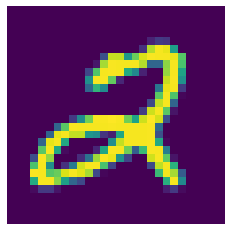

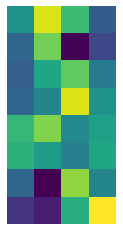

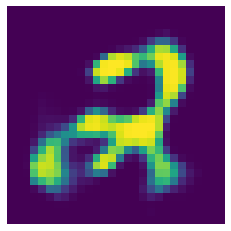

In [82]:
plt.imshow(np.reshape(output_samples[0], (28,28)))
plt.axis('off')
plt.show()
plt.imshow(np.reshape(encoded[0], (8,4)))
plt.axis('off')
plt.show()
plt.imshow(np.reshape(predicted[0], (28,28)))
plt.axis('off')
plt.show()

---

## Deep AutoEncoder

`Stacked AutoEncoder` - both `encoder` and `decoder` have more complex structure, and the model has a `bottleneck`. 

![alt text](AutoEncoder.png "Title")

#### Data

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

C:\Users\pk764\miniconda3\envs\data\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def map_image(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    image = tf.reshape(image, shape=(784,))
    return image, image

In [9]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

#### Model

In [5]:
inputs=tf.keras.layers.Input(shape=(784,))
encoder=tf.keras.layers.Dense(128,activation='relu')(inputs)
encoder=tf.keras.layers.Dense(64,activation='relu')(encoder)
encoder=tf.keras.layers.Dense(32,activation='relu')(encoder)
decoder=tf.keras.layers.Dense(64,activation='relu')(encoder)
decoder=tf.keras.layers.Dense(128,activation='relu')(decoder)
decoder=tf.keras.layers.Dense(784,activation='sigmoid')(decoder)

#inputs_decoder=tf.keras.layers.Input(shape=(32,))
#decoder_model=tf.keras.models.Model(inputs=inputs_decoder,outputs=decoder)

encoder_model=tf.keras.models.Model(inputs=inputs,outputs=encoder)
autoencoder=tf.keras.models.Model(inputs=inputs,outputs=decoder)

In [10]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam())

In [11]:
train_steps=60000 // BATCH_SIZE
history=autoencoder.fit(train_dataset,steps_per_epoch=train_steps,epochs=20)

Epoch 1/20
468/468 [==============================] - 5s 8ms/step - loss: 0.1999
Epoch 2/20
468/468 [==============================] - 3s 7ms/step - loss: 0.1319
Epoch 3/20
468/468 [==============================] - 3s 7ms/step - loss: 0.1191
Epoch 4/20
468/468 [==============================] - 3s 7ms/step - loss: 0.1115
Epoch 5/20
468/468 [==============================] - 3s 7ms/step - loss: 0.1063
Epoch 6/20
468/468 [==============================] - 3s 7ms/step - loss: 0.1030
Epoch 7/20
468/468 [==============================] - 4s 7ms/step - loss: 0.1004
Epoch 8/20
468/468 [==============================] - 3s 7ms/step - loss: 0.0983
Epoch 9/20
468/468 [==============================] - 3s 7ms/step - loss: 0.0967
Epoch 10/20
468/468 [==============================] - 3s 7ms/step - loss: 0.0952
Epoch 11/20
468/468 [==============================] - 3s 7ms/step - loss: 0.0940
Epoch 12/20
468/468 [==============================] - 3s 7ms/step - loss: 0.0931
Epoch 13/20
468/468 [====

#### Prediction

In [12]:
images=test_dataset.take(1)
for input_image, image in tfds.as_numpy(images):
      output_samples = input_image

In [13]:
encoded=encoder_model.predict(images)
predicted=autoencoder.predict(images)

1/1 [==============================] - 0s 151ms/step


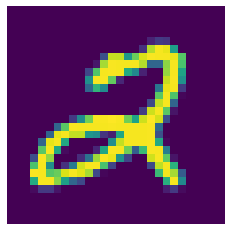

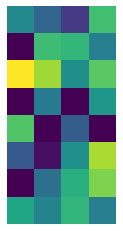

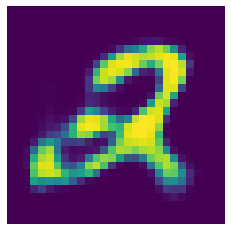

In [14]:
plt.imshow(np.reshape(output_samples[0], (28,28)))
plt.axis('off')
plt.show()
plt.imshow(np.reshape(encoded[0], (8,4)))
plt.axis('off')
plt.show()
plt.imshow(np.reshape(predicted[0], (28,28)))
plt.axis('off')
plt.show()

---

## Convolutional AutoEncoder

![alt text](ConvolutionalAutoEncoder.png "Title")

#### Data

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def map_image(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    return image, image

In [41]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('fashion_mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('fashion_mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

#### Model

In [34]:
def encoder(inputs):
    conv_1=tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(inputs)
    pool_1=tf.keras.layers.MaxPool2D((2,2))(conv_1)
    conv_2=tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(pool_1)
    pool_2=tf.keras.layers.MaxPool2D((2,2))(conv_2)
    return pool_2

In [35]:
def bottleneck(inputs):
    bottle_neck=tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(inputs)
    encoder_vizualization=tf.keras.layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(bottle_neck)
    return bottle_neck,encoder_vizualization

In [36]:
def decoder(inputs):
    conv_1=tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(inputs)
    upsampling_1=tf.keras.layers.UpSampling2D((2,2))(conv_1)
    conv_2=tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(upsampling_1)
    upsampling_2=tf.keras.layers.UpSampling2D((2,2))(conv_2)
    conv_3=tf.keras.layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(upsampling_2)
    return conv_3

In [37]:
inputs=tf.keras.layers.Input(shape=(28,28,1))
encoder=encoder(inputs)
bottleneck,encoder_vizualization=bottleneck(encoder)
decoder=decoder(bottleneck)

encoder_model=tf.keras.models.Model(inputs=inputs,outputs=encoder_vizualization)
autoencoder=tf.keras.models.Model(inputs=inputs,outputs=decoder)

In [43]:
train_steps = 60000 // BATCH_SIZE
valid_steps = 60000 // BATCH_SIZE

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
history = autoencoder.fit(train_dataset, steps_per_epoch=train_steps, validation_data=test_dataset, validation_steps=valid_steps, epochs=5)

Epoch 1/5
468/468 [==============================] - 437s 933ms/step - loss: 0.2981 - val_loss: 0.2700
Epoch 2/5
468/468 [==============================] - 371s 793ms/step - loss: 0.2635 - val_loss: 0.2624
Epoch 3/5
468/468 [==============================] - 379s 810ms/step - loss: 0.2582 - val_loss: 0.2582
Epoch 4/5
468/468 [==============================] - 366s 782ms/step - loss: 0.2550 - val_loss: 0.2558
Epoch 5/5
468/468 [==============================] - 372s 795ms/step - loss: 0.2530 - val_loss: 0.2551


#### Prediction

In [45]:
images=test_dataset.take(1)
for input_image, image in tfds.as_numpy(images):
      output_samples = input_image

In [46]:
encoded=encoder_model.predict(images)
predicted=autoencoder.predict(images)

1/1 [==============================] - 0s 234ms/step


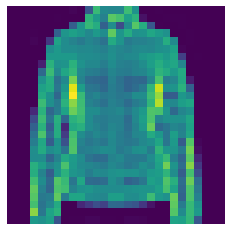

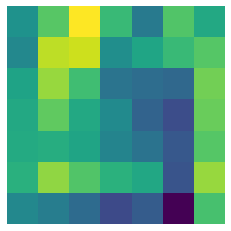

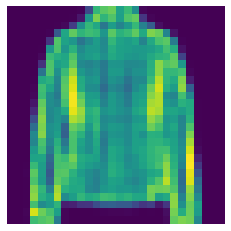

In [47]:
plt.imshow(output_samples[0])
plt.axis('off')
plt.show()
plt.imshow(encoded[0])
plt.axis('off')
plt.show()
plt.imshow(predicted[0])
plt.axis('off')
plt.show()

---

## Denoising AutoEncoder

#### Data

In [44]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def map_image_noise(image, label):
    noise_factor=0.5
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    factor=noise_factor*tf.random.normal(shape=image.shape)
    noisy_image=image+factor
    noisy_image=tf.clip_by_value(noisy_image,0,1)
    return noisy_image, image

In [ ]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('fashion_mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image_noise)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('fashion_mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image_noise)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

#### Model

In [ ]:
inputs=tf.keras.layers.Input(shape=(28,28,1))
encoder=encoder(inputs)
bottleneck,encoder_vizualization=bottleneck(encoder)
decoder=decoder(bottleneck)

encoder_model=tf.keras.models.Model(inputs=inputs,outputs=encoder_vizualization)
autoencoder=tf.keras.models.Model(inputs=inputs,outputs=decoder)

In [ ]:
train_steps = 60000 // BATCH_SIZE
valid_steps = 60000 // BATCH_SIZE

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
history = autoencoder.fit(train_dataset, steps_per_epoch=train_steps, validation_data=test_dataset, validation_steps=valid_steps, epochs=5)

#### Prediction